# 1. Research Question (prepare problem).

With this project I am awnswering what has the biggest impact on heart faliture and if it is possible to predict this with a given number of parameters.

Heart disease is one of the worlds most pressing problems in terms of healthcare.

## 1.1 Dataset

Dataset comes from [here](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved 6/11/2021 from [https://www.kaggle.com/fedesoriano/heart-failure-prediction.](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Data discussion

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Print where file is being found.
print("Search file in", os.getcwd())

# Define dataframe and print head.
df = pd.read_csv("heart_failure_dataset.csv")
df.head()

# Save data df.to_csv("./data/data2.xlsx")

Search file in C:\Users\finnn\Documents\GitHub\AI


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2.1 Summerize data

### 2.1.1. Dimensions

In [9]:
print("Shape:",df.shape)

Shape: (918, 12)


#### Observation
Below is showing that there is 918 rows with 12 attributes. This also shows us the averages for each quantile.

### 2.1.2. Peek 

In [10]:
print(df.head(1))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  


#### Observation
Below shows a peek which takes the first row. This shows the different attributes such as age, chestpain and the end result for heart disease.

### 2.1.3. Statistical summary

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Observations
Above shows that there are 918 observations. As seen the mean age of each patient has an average age of 53, with a minimum age of 28 and max of 77. In the 50% quantile of age it is shown the age is 54, which shows in terms of age is slightly scewed to older patients. In the lower 25% quantile the age is 47, showing again a scew towards older patients. 

In this statsitcal summary it is also shwon that the lower 25% of patients do not have heart disease. This is shown in the mean for this collumn bing 0.55.

# 2.2 Data visualizations
Below is data visualisations looking into the dataset.


## 2.2.1 Univariate 
Below is an overview of the histograms realting to each variable.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

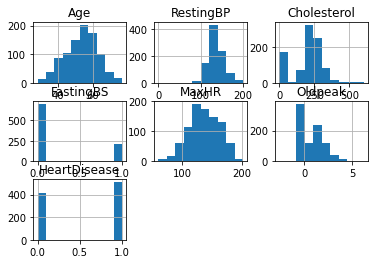

In [12]:
df.hist()

### 2.2.1.1 Age histogram

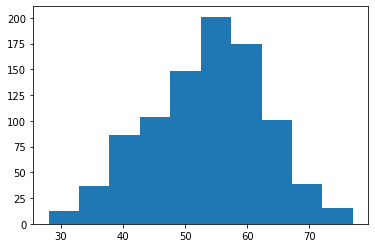

In [13]:
# Age histrogram

plt.hist(df["Age"])
df.dropna(inplace=True)
plt.show()

#### Observations
Below shows the distribution of the age variable. This shows that there is a slight positive scew.

### 2.2.1.2 Heart Disease

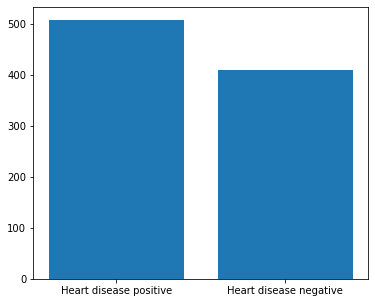

In [14]:
# Counts number of positive cases and negative cases more info 

barDataArray = [df['HeartDisease'].value_counts()[1], df['HeartDisease'].value_counts()[0]]
barNames = ('Heart disease positive', 'Heart disease negative')
# Create a range of number of bar names.
y_pos = np.arange(len(barNames))

# Add bar data
plt.bar(y_pos, barDataArray)

# Add bar labels
plt.xticks(y_pos, barNames)

# Change size
plt.gcf().set_size_inches(6, 5)

# Show graphic
plt.show()

# More info: https://towardsdatascience.com/change-figure-size-matplotlib-11a409f39584
# https://www.width.ai/pandas/count-specific-value-in-column-with-pandas

#### Observations
With the histogram above his dataset is showing that there is a positive screw towards patients with heart disease.

### 2.2.1.3 Chest pain type

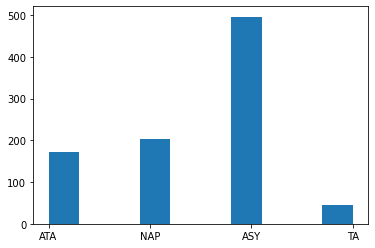

In [15]:
plt.hist(df["ChestPainType"])
df.dropna(inplace=True)

plt.show()

#### Observations
Above show that a signifficant number of patients are diagnosed witgh ASY symptoms

### 2.2.1.4 Cholesterol

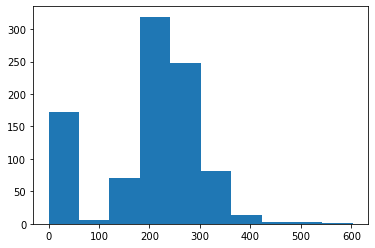

In [16]:
plt.hist(df["Cholesterol"])
df.dropna(inplace=True)
plt.show()

#### Observations
Above shows that a number of patients show **0** cholesterol. 

### 2.2.1.5 Exercise Angina

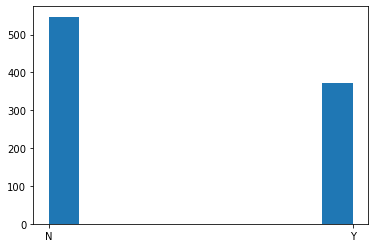

In [17]:
plt.hist(df["ExerciseAngina"])
df.dropna(inplace=True)
plt.show()

#### Observations
Above shows that angina (chest pain) brought on by exercise below is not signifficant.

### 2.2.1.6 Gender

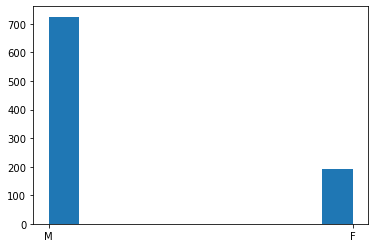

In [18]:
plt.hist(df["Sex"])
df.dropna(inplace=True)
plt.show()

#### Observations
Above shows there is a signifficant number more males in this dataset than females.

This removes the ability to comapre the differences between gender and heart disease.

## 2.2.2 Multivariate plots

### Correlation matrix plot

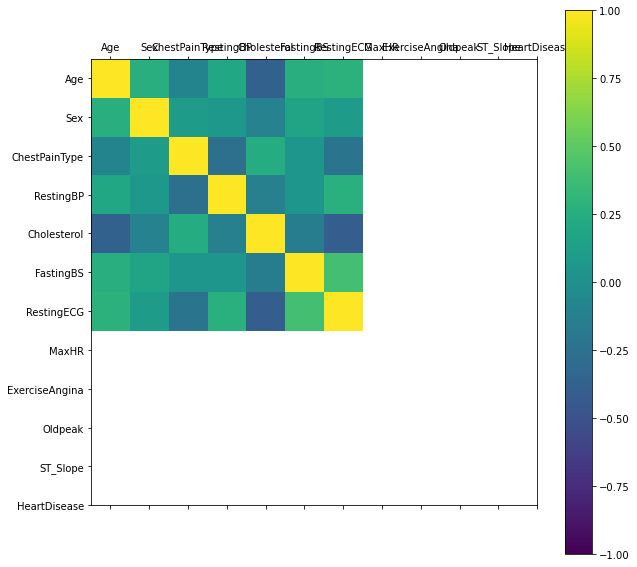

In [19]:
# Correlation Matrix Plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# df = pd.read_excel("./data/data_select.xlsx")
names = df.columns
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

#### Observations
As there is a lot of catigorical data it makes it difficult to draw corilations. However, this means I am looking for assosiation rather than corrilation. 

https://www.quora.com/Can-I-use-Pearsons-correlation-with-categorical-variables

### Scatter matrix

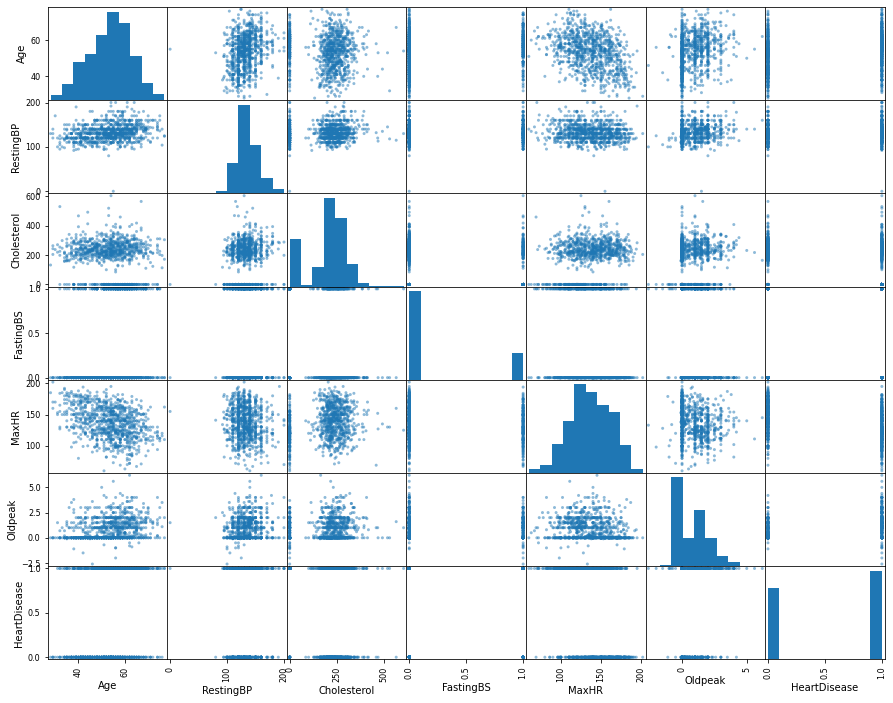

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.plotting.scatter_matrix(df, figsize=(15,12))
plt.show()

### Observations

* There is a negative corilation with MaxHR and age.  
* There is a slight positive corilation with age and resting BP.  
* There is a slight positive corilation between Cholestrol and Resting BP. Because your heart has to work harder.  


# Preprocessing 0&1
Changing M and F into 0 and 1  
Change chest pain to ATA, NAP, ASY and TA  
Changing resting ECG 3 categories Normal, ST and LVH.  
Exercise Exercise Angina to 0 and 1  
Change ST_Slope to 3 categories UP Down and Flat.

**NOTE SOME cholesterol VALUES ARE 0. THIS WILL BE EVAUATED LATER**

In [67]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart_failure_dataset.csv")

#Remove missing values df.dropna(inplace=True)
#print(n-df.shape[0], "Observation(s) with NaNs deleted")

#1 for males.
df["Male"]=np.where(df["Sex"]=="M",1,0)

df["ATAChestPain"]=np.where(df["ChestPainType"]=="ATA", 1,0)
df["NAPChestPain"]=np.where(df["ChestPainType"]=="NAP", 1,0)
df["ASYChestPain"]=np.where(df["ChestPainType"]=="ASY", 1,0)
df["TAChestPain"]=np.where(df["ChestPainType"]=="TA", 1,0)

df["RestECGNORM"]=np.where(df["RestingECG"]=="Normal", 1,0)
df["RestECGST"]=np.where(df["RestingECG"]=="ST", 1,0)
df["RestECGLVH"]=np.where(df["RestingECG"]=="LVH", 1,0)

df["ExerciseAngina"]=np.where(df["ExerciseAngina"]=="Y", 1,0)

df["FlatSTSlope"]=np.where(df["ST_Slope"]=="Flat", 1,0)
df["UPSTSlope"]=np.where(df["ST_Slope"]=="Up", 1,0)
df["DownSTSlope"]=np.where(df["ST_Slope"]=="Down", 1,0)

#x = np.int.replace('The quick brown fox', 'fox', 'wolf')
#df["Cholesterol"] = np.palce(df["Cholesterol"], "0", np.nan)
# unchanged variables



df[["Age", "Male", "ATAChestPain", "NAPChestPain", "ASYChestPain", "TAChestPain", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "RestECGNORM", "RestECGST", "RestECGLVH", "ExerciseAngina", "FlatSTSlope", "UPSTSlope", "Oldpeak", "DownSTSlope", "HeartDisease"]].to_csv("processed_heart_failure_data.csv", index=False)
df[["Age", "Male", "NAPChestPain", "ASYChestPain", "TAChestPain", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "RestECGST", "RestECGLVH", "ExerciseAngina", "UPSTSlope", "Oldpeak", "DownSTSlope", "HeartDisease"]].to_csv("dummy_processed_heart_failure_data.csv", index=False)
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ATAChestPain,NAPChestPain,ASYChestPain,TAChestPain,RestECGNORM,RestECGST,RestECGLVH,FlatSTSlope,UPSTSlope,DownSTSlope
0,40,M,ATA,140,289,0,Normal,172,0,0.0,...,1,0,0,0,1,0,0,0,1,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,...,0,1,0,0,1,0,0,1,0,0
2,37,M,ATA,130,283,0,ST,98,0,0.0,...,1,0,0,0,0,1,0,0,1,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,...,0,0,1,0,1,0,0,1,0,0
4,54,M,NAP,150,195,0,Normal,122,0,0.0,...,0,1,0,0,1,0,0,0,1,0


## Running seaborn pairplot of classification variables
https://seaborn.pydata.org/generated/seaborn.pairplot.html

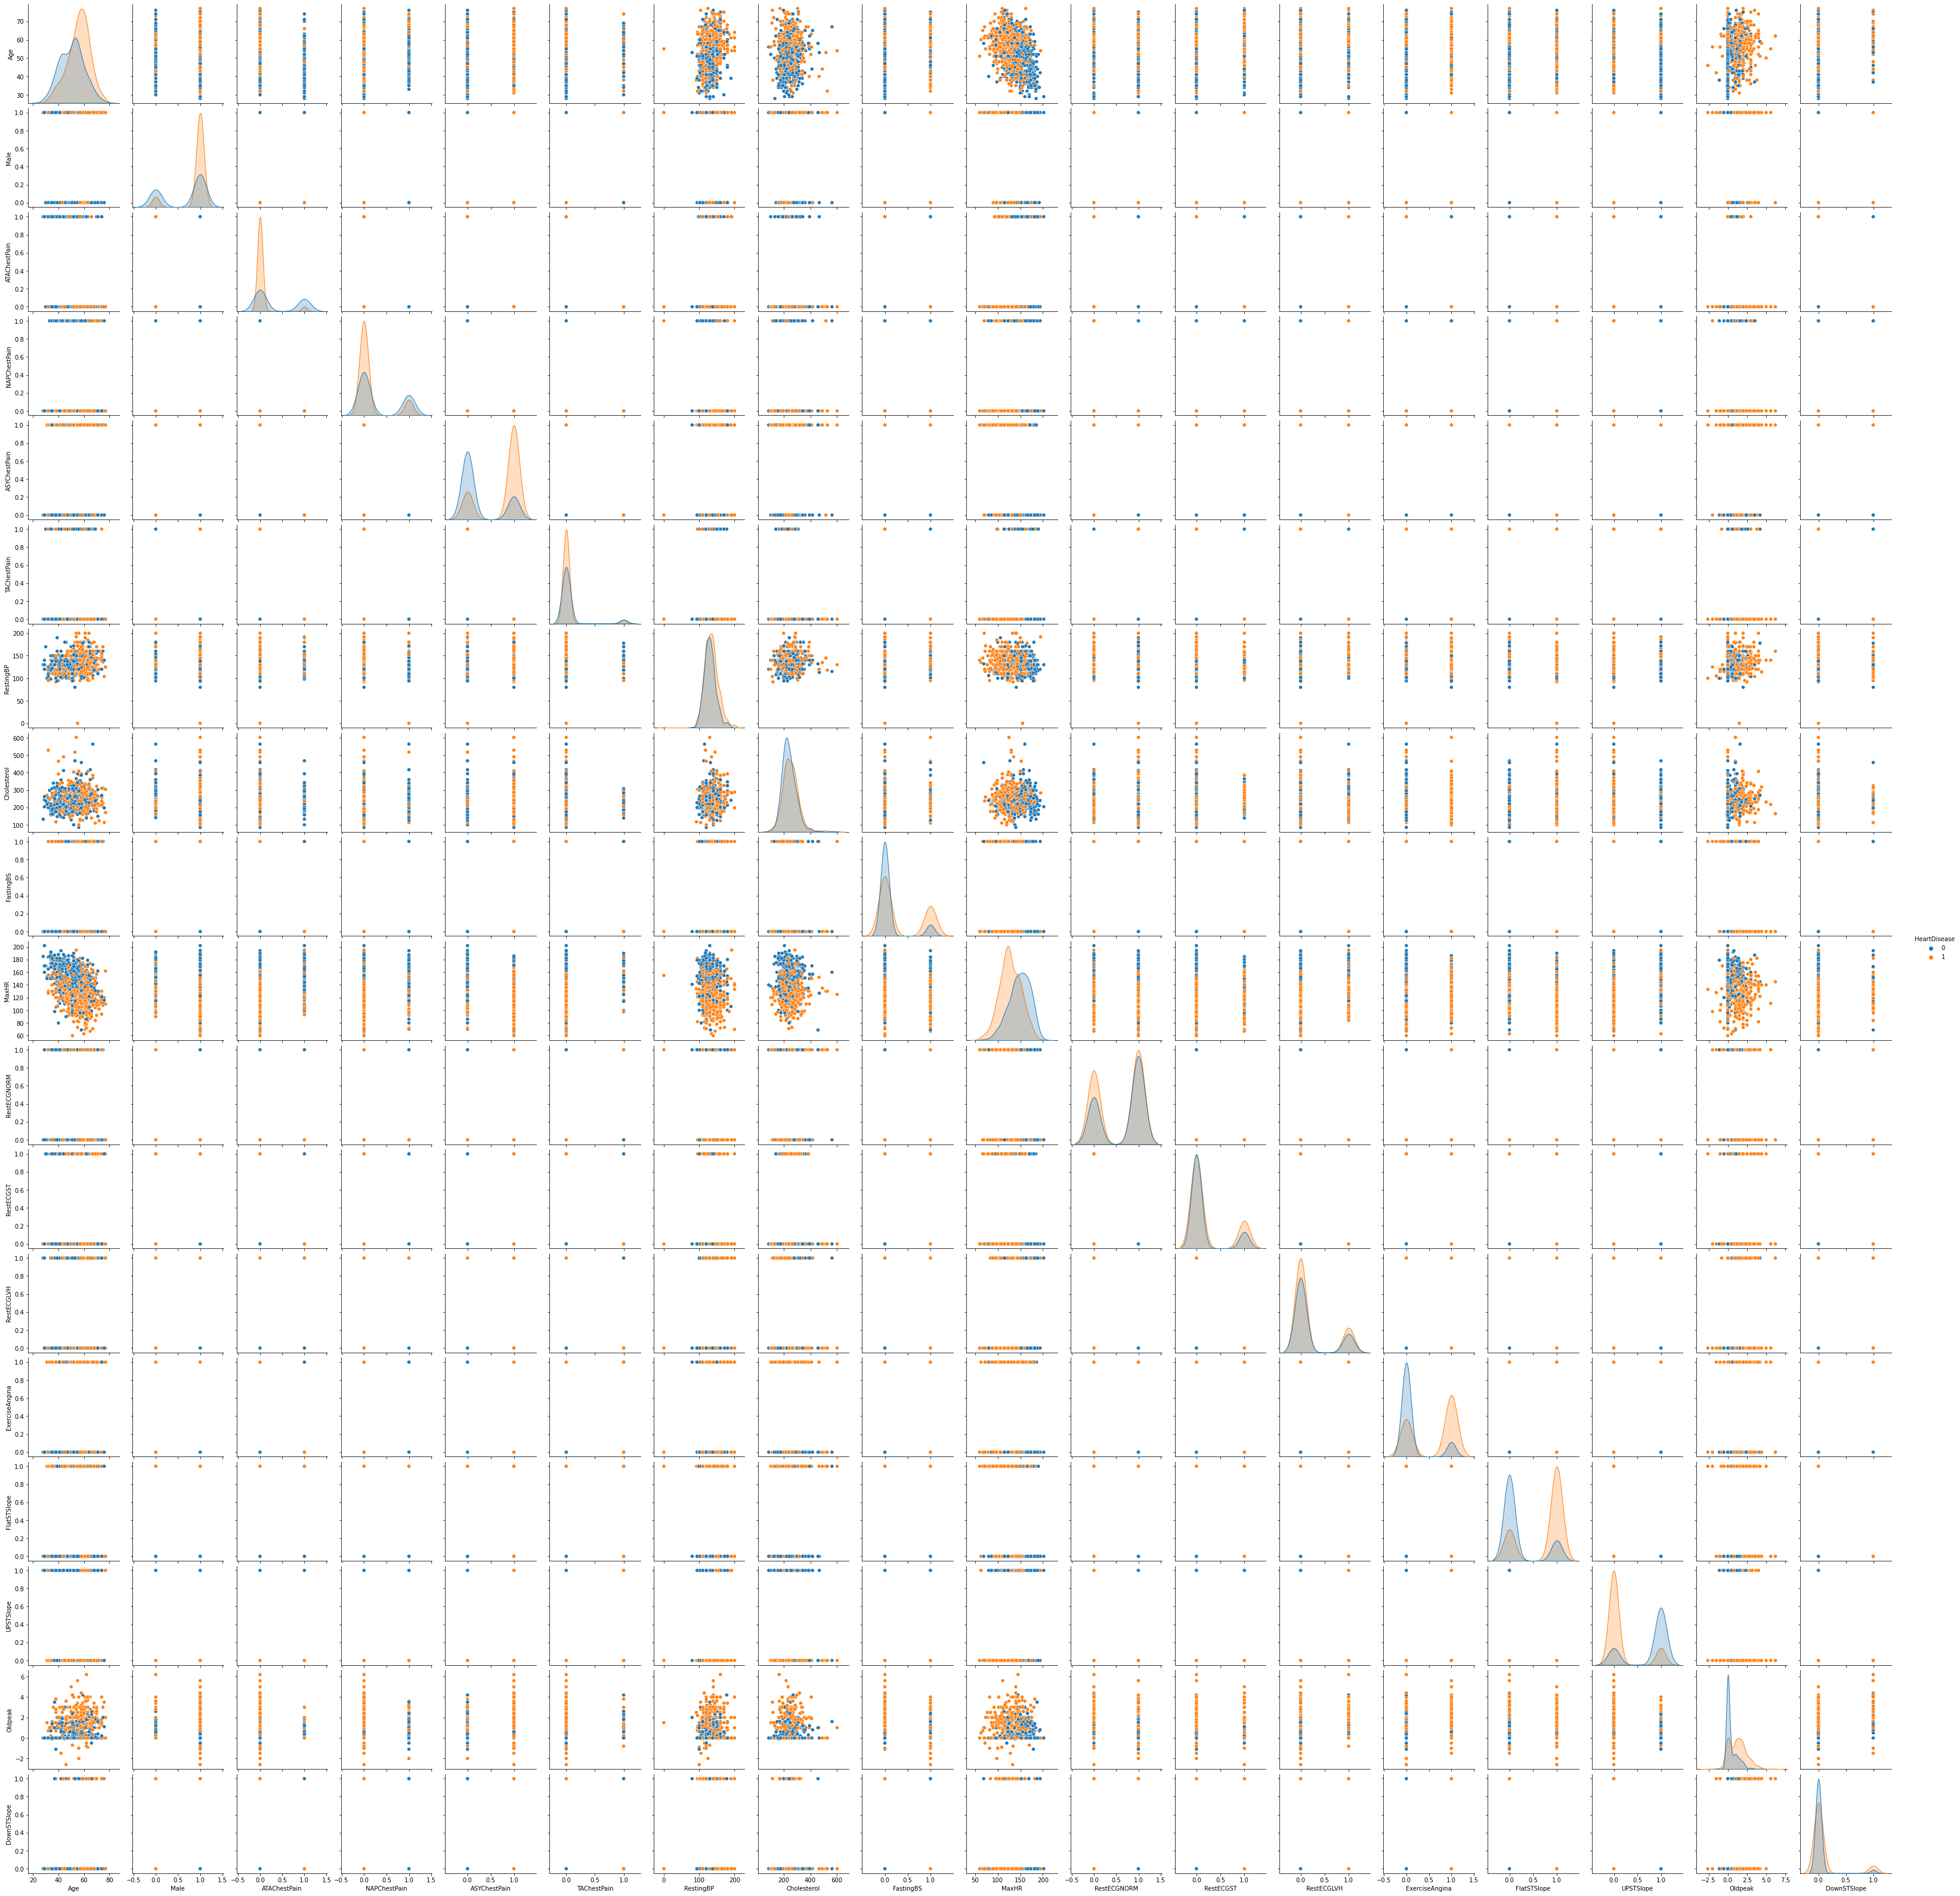

In [23]:
import seaborn as sns
df = pd.read_csv("processed_heart_failure_data.csv")
sns.pairplot(df, hue="HeartDisease")

### Obervations




## Data Cleaning (missing values)

As been below there is missing values in this dataset for cholesterol.

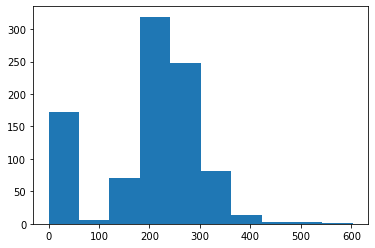

0
0


In [68]:
df = pd.read_csv("processed_heart_failure_data.csv")

plt.hist(df["Cholesterol"])
df.dropna(inplace=True)
plt.show()

#print(df['Cholesterol'].isna().sum())
#print(df.isna().sum().sum())

There are multiple ways to deal with missing data values. 

* Delete data
 * This dataset would be be halved.
* Impute (substitue)
 * Using the mean, but loss of data. 
* Algorhythems
 * Good, but loss of real world data.
* Prediction - deeplearning etc
 * Good, but again loss of real world data.

https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e  
https://www.numpyninja.com/post/mice-and-knn-missing-value-imputations-through-python

MICE

Multiple Imputation by Chained Equations (MICE) is an imputation method that works with the assumption that the missing data are Missing at Random (MAR). Recall that for MAR, the nature of the missing data is related to the observed data but not the missing data.

Both MICE and KNN imputations are calculated as per logical reasoning with data and its relation to other features. 

It is way above other imputation methods like mean, median, mode, simple imputations or random value imputation. However it is used for MAR category of missing variables.

I hope after reading this blog MICE and KNN imputations must be easy to understand.

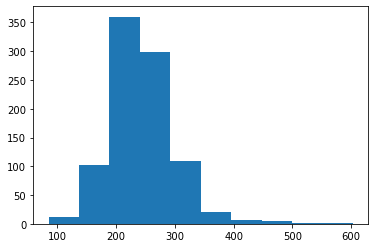

In [79]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt


# Load and replace all "0" with NaN so the KNN network can locate the data without changing all 0's in the dataset.
knnDataSetUsed = pd.read_csv("processed_heart_failure_data.csv")
knnDataSetUsed["Cholesterol"] = np.where(knnDataSetUsed["Cholesterol"]==0, float("NaN"),knnDataSetUsed["Cholesterol"])

# Define hyperparameters for KNN imuter. 

imputer = KNNImputer(missing_values=float("NaN"), n_neighbors=2, weights="uniform")
outputd = imputer.fit_transform(knnDataSetUsed)

df = pd.DataFrame(outputd)

# Rename collums with old headers.
count = -1
for col in knnDataSetUsed.columns:
    count += 1
    df.rename(columns={count: knnDataSetUsed.columns[count]}, inplace=True)

# Save to CSV
df.to_csv("processed_imputer_heart_failure_data.csv", index=False)

# Results

df = pd.read_csv("processed_imputer_heart_failure_data.csv")

plt.hist(df["Cholesterol"])
df.dropna(inplace=True)
plt.show()

### Observations

# Feature selection

In [102]:
# ONLY USE THIS ONE.... aparently.

# recursive feature elimination
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("processed_heart_failure_data.csv")
array = df.values
# separate array into input and output components
X = array[:,0:-1]
Y = array[:,-1]

# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=5) # features to select
fit = rfe.fit(X, Y)
print("Num Features:", fit.n_features_)

my_scores = pd.DataFrame([fit.support_, fit.ranking_], columns = df.columns[0:-1], index = ["selected:", "ranking:"]) # data = scores, columns = attribute names
print(my_scores.round(1).to_string())
my_scores.to_csv("featureSelectionResults.csv", index=False)

Num Features: 5
             Age  Male ATAChestPain NAPChestPain ASYChestPain TAChestPain RestingBP Cholesterol FastingBS  MaxHR RestECGNORM RestECGST RestECGLVH ExerciseAngina FlatSTSlope UPSTSlope Oldpeak DownSTSlope
selected:  False  True        False        False         True       False     False       False      True  False       False     False      False           True       False      True   False       False
ranking:      11     1            3            4            1           5        14          13         1     12           8        10          9              1           2         1       7           6


### Observations

# Standarize data

Note that there are still 0 values for cholesterol, this will be inspted later.

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("processed_heart_failure_data.csv")
array = df.values
# separate array into input and output components
X = array[:,0:-1]
Y = array[:,-1]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
#np.set_printoptions(precision=3)

df = pd.DataFrame(rescaledX)
df['18'] = Y.tolist()
df.to_csv("standardized_heart_failure_data.csv", index=False)


### Observations

# Evauating Algorithms

LR: 0.850609 (0.051874)
LDA: 0.851696 (0.056704)
KNN: 0.848483 (0.063465)
CART: 0.776589 (0.061394)
NB: 0.854969 (0.061682)
SVM: 0.852795 (0.069236)


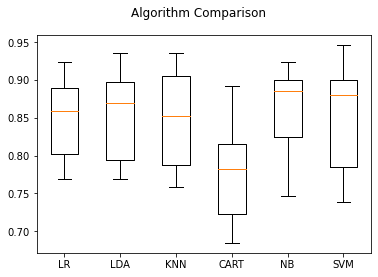

In [63]:
# Compare Algorithms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

df = pd.read_csv("standardized_heart_failure_data.csv")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Observations


LinearDiscriminantAnalysis and logistic regression perform better in this case

## Logistic regression
Classification accuracy is the best fit for this type of model as it is only concerd about accuracy in reguards to the total number of predictions.

In [88]:
# Cross Validation Classification Accuracy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("standardized_heart_failure_data.csv")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

kfold = KFold(n_splits=10)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
print(report)

Accuracy: 0.851 (0.052)
              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79       128
         1.0       0.82      0.93      0.87       175

    accuracy                           0.84       303
   macro avg       0.85      0.83      0.83       303
weighted avg       0.85      0.84      0.84       303



### Observations and evaluation

* Precision - Out of all the predictions what percentage are correct. This is shown above for both negative and positive.
 * Above is shown that there is higher precision for negative heart disease than positive.
* Recall - Out of all the correct positive predictions, how many of the total positive did the algorithm find.
 * For recall the model performs well for finding positive cases however falls short for finding negative cases out of the entire dataset.
* f1-score - both percision and recall combined into one
 * Above it is shown that once these are combined for negative cases logistic regression sits at 0.79 and positive at 0.87.
 
 https://towardsdatascience.com/the-f1-score-bec2bbc38aa6  
 https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

### Logarithmic loss evaluation - Logistics regression
Loss nearer to 0 indicates higher accuracy. Works by penalising false classifications.This is for for logistic regression.

In [99]:
# Cross Validation Classification LogLoss
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("standardized_heart_failure_data.csv")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

kfold = KFold(n_splits=10)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.360 (0.109)


#### Observation 
The likleyhood of a prediction being correct. This is the error of logistic regression as this is a classifier (between 1 and 0) and mean squared error doesn't work.

### Logistics regression optimization with train and test split

In [106]:
# Evaluate using a train and a test set
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("standardized_heart_failure_data.csv")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

test_size = 0.20
seed = 0  # fix seed
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

# Using logistic regression.
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
# Model is 'fitted' on the data above ^

result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 82.609%


#### Observation
Above is shown using a different split ratio for the outcome changes.

## Confusion matrix for logistic regression

In [107]:
# Cross Validation Classification Confusion Matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score

df = pd.read_csv("standardized_heart_failure_data.csv")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print("Accuracy = ",round(accuracy_score(Y_test, predicted),2))
#print(predicted)

[[ 98  30]
 [ 18 157]]
Accuracy =  0.84


#### Observation
* Starting from the top left the **true negative** meaning the number of negatives that where predicted correctly. In this **99** where correctly predicted as negative.
* On the bottom left is the **false negative** meaning the number incorrectly predicted positive cases was **17**.
* On the top right is the **flase positives** this means **29** where incorrectly labelled as positive.
* On the bottom right is the **true positives** meaning **158** where predicted as corectly as true.

As the dataset  was split the total is not 918.

| Confusion | Prediction=0           | Prediction = 1   |
| ------------- |:-------------:| -----:|
| **Actual=0**      | true positive | false negative |
| **Actual=1**      | false positive      |   true negative |

## Combinding models

In [9]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv("standardized_heart_failure_data.csv")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]
kfold = KFold(n_splits=10)
# create the sub models
estimators = []

model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))

model2 = LinearDiscriminantAnalysis()
estimators.append(('lda', model2))

model3 = SVC(gamma='auto')
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.8527950310559007


### Save model with pickle
https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [31]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ensemble, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model
print(result)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(solver='liblinear')),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('svm', SVC(gamma='auto'))])


## Neural Networks

### Install tensorflow
The command "%%capture" stops output logs.

In [86]:
%%capture
pip install tensorflow

## Automated optimizer

In [51]:
import pandas as pd
from keras import models 
from keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# load the dataset
dataset = pd.read_csv('standardized_heart_failure_data.csv').values
# split into input (X) and output (y) variables
X = dataset[:,0:7]
y = dataset[:,7]
# define the keras model
def create_model(opt, init):
    model = models.Sequential()
    model.add(layers.Dense(12, kernel_initializer = init, input_dim=7, activation='relu'))
    model.add(layers.Dense(8, kernel_initializer = init, activation='relu'))
    model.add(layers.Dense(1, kernel_initializer = init, activation='sigmoid'))
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [2, 5, 10]
batches = [5, 10, 100]
param_grid = dict(opt=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\finnn\AppData\Local\Temp/ipykernel_21524/248331928.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.152505 using {'batch_size': 100, 'epochs': 5, 'init': 'glorot_uniform', 'opt': 'adam'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 2, 'init': 'glorot_uniform', 'opt': 'rmsprop'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 2, 'init': 'glorot_uniform', 'opt': 'adam'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 2, 'init': 'normal', 'opt': 'rmsprop'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 2, 'init': 'normal', 'opt': 'adam'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 2, 'init': 'uniform', 'opt': 'rmsprop'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 2, 'init': 'uniform', 'opt': 'adam'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 5, 'init': 'glorot_uniform', 'opt': 'rmsprop'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 5, 'init': 'glorot_uniform', 'opt': 'adam'}
0.002179 (0.003081) with: {'batch_size': 5, 'epochs': 5, 'init': 'normal', 'opt': 'rmsprop'}
0.002179 (0.003081) with: {'batch_size': 5, 'e

### Observations

### Small network

Epoch 1/5
62/62 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6504 - val_loss: 0.5588 - val_accuracy: 0.7261
Epoch 2/5
62/62 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8211 - val_loss: 0.5064 - val_accuracy: 0.7690
Epoch 3/5
62/62 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8797 - val_loss: 0.4920 - val_accuracy: 0.7690
Epoch 4/5
62/62 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8894 - val_loss: 0.4952 - val_accuracy: 0.7690
Epoch 5/5
29/29 [==============================] - 0s 851us/step - loss: 0.3391 - accuracy: 0.8562
Accuracy: 85.62
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


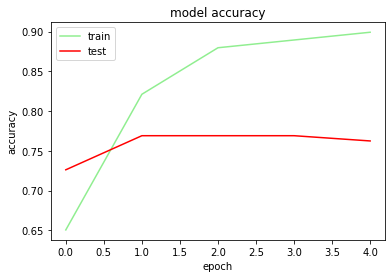

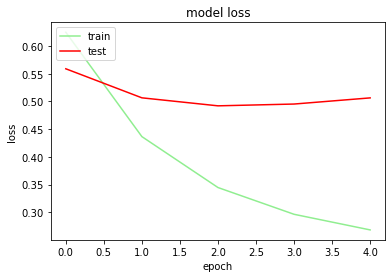

In [49]:
import pandas as pd
from keras import models 
from keras import layers
# load the dataset
dataset = pd.read_csv('./standardized_heart_failure_data.csv').values
# split into input (X) and output (y) variables
X = dataset[:,0:18]
y = dataset[:,18]
# define the keras model
model = models.Sequential()
model.add(layers.Dense(19, input_dim=18, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, y, validation_split=0.33, epochs=5, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

# plot accuracy over epochs
print(history.history.keys())
plt.plot(history.history['accuracy'], color="lightgreen")
plt.plot(history.history['val_accuracy'], color="red")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss over epochs
plt.plot(history.history['loss'], color="lightgreen")
plt.plot(history.history['val_loss'], color="red")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Observations

### Large network

Epoch 1/5
62/62 [==============================] - 1s 4ms/step - loss: 0.5861 - accuracy: 0.7431 - val_loss: 0.6068 - val_accuracy: 0.6766
Epoch 2/5
62/62 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8943 - val_loss: 0.5465 - val_accuracy: 0.7393
Epoch 3/5
62/62 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9171 - val_loss: 0.6070 - val_accuracy: 0.7360
Epoch 4/5
62/62 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9268 - val_loss: 0.6340 - val_accuracy: 0.7261
Epoch 5/5
29/29 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8617
Accuracy: 86.17
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


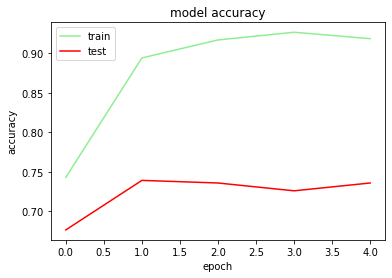

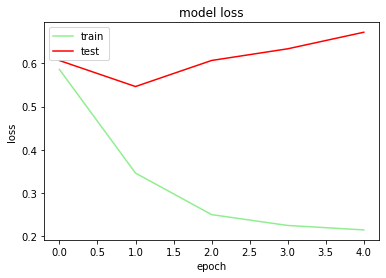

In [50]:
import pandas as pd
from keras import models 
from keras import layers
# load the dataset
dataset = pd.read_csv('./standardized_heart_failure_data.csv').values
# split into input (X) and output (y) variables
X = dataset[:,0:18]
y = dataset[:,18]
# define the keras model
model = models.Sequential()
model.add(layers.Dense(19, input_dim=18, activation='relu'))
model.add(layers.Dense(19, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, y, validation_split=0.33, epochs=5, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

# plot accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'], color="lightgreen")
plt.plot(history.history['val_accuracy'], color="red")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss over epochs
plt.plot(history.history['loss'], color="lightgreen")
plt.plot(history.history['val_loss'], color="red")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Observations

## Optimizations and save

# 5. Results

# References

In [ ]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries (pandas, matplotlib, sklearn)
# b) Load dataset (read_csv)
# 2. Summarize Data
# a) Summarize Dataset (Dimension, Peek, Statistical summary)
# b) Descriptive statistics (mean and distribution)
# c) Data visualizations (Univariate and Multivariate plots)
# 3. Prepare Data
# a) Data Cleaning (missing values)
# b) Feature Selection (Features to choose)
# c) Data Transforms (standardisation)

# 4. Evaluate Algorithms
# a) Split-out validation dataset (training vs. testing data)
# b) Test options and evaluation metric (sum of squared errors for regression or accuarcy for classification)
# c) Spot Check Algorithms (test different models)
# d) Compare Algorithms (select best model)


# 5. Improve Accuracy
# a) Algorithm Tuning (tune hyperparameters)
# b) Ensembles (combine different models)
# 6. Finalize Model
# a) Predictions on validation dataset (final predictions)
# b) Create standalone model on entire training dataset (complete final model)
# c) Save model for later use (store the final model)